# **Exploratory Data Analysis, Feature Engineering, and Developing a Machine Learning Model to Prevent Telco Customer Churn**

# Business Problem

### It is requested to develop a machine learning model that can predict customers who will leave the company. You are expected to perform the necessary data analysis and feature engineering steps before developing the model.

# Dataset Story

### Telco customer churn data includes information about a fictitious telecom company that provided home phone and Internet services to 7043 California customers in the third quarter. It includes which customers have left, stayed or signed up for the service.

# Some information on the dataset

* Each row represents a unique customer.
* Variables contain information about customer service, account and demographic data.
* Services that customers sign up for - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they have been a customer, contract, payment method, paperless invoicing, monthly fees and total fees
* Demographic information about customers - gender, age range and whether they have partners and dependents

# Variables 

### 21 Variables 7043 Observations

*  CustomerId : Customer ID
*  Gender : Gender
*  SeniorCitizen : Whether the client is old (1, 0)
*  Partner : Whether the customer has a partner (Yes, No) ? whether to be married
*  Dependents : Whether the customer has dependents (Yes, No) (Child, mother, father, grandmother)
*  tenure : The number of months the customer has stayed with the company
*  PhoneService : Whether the customer has phone service (Yes, No)
*  MultipleLines : Whether the customer has more than one line (Yes, No, No Telephone service)
*  InternetService: Customer's internet service provider (DSL, Fiber optic, No)
*  OnlineSecurity : Whether the customer has online security (Yes, No, no Internet service)
*  OnlineBackup : Whether the customer has an online backup (Yes, No, no Internet service)
*  DeviceProtection : Whether the customer has device protection (Yes, No, no Internet service)
*  TechSupport : Whether the customer receives technical support (Yes, No, no Internet service)
*  StreamingTV : Indicates whether the customer is broadcasting TV (Yes, No, no Internet service) Indicates whether the customer uses the Internet service to stream television programs from a third-party provider
*  StreamingMovies : Whether the customer is streaming movies (Yes, No, no Internet service) Indicates whether the customer is using the Internet service to stream movies from a third-party provider
*  Contract : Contract duration of the client (Month to month, One year, Two years)
*  PaperlessBilling : Whether the customer has a paperless invoice (Yes, No)
*  PaymentMethod : Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))
*  MonthlyCharges : The amount charged monthly from the customer
*  TotalCharges : The total amount charged from the customer
*  Churn : Whether the customer uses (Yes or No) - Customers who left in the last month or quarter

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# Importing the dataset

In [2]:
def load():
    data = pd.read_csv("/kaggle/input/telco-churn-dataset/Telco-Customer-Churn.csv")
    data.columns = [col.lower() for col in data.columns]
    return data

df = load()
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


# Exploratory data analysis (EDA)

## Let's check the dataframe

In [3]:
def check_dataframe(dataframe, head=5):
    print(' head '.upper().center(150, "*"))
    display(dataframe.head(head))
    print('\n',' tail '.upper().center(150, "*"))
    display(dataframe.tail(head))
    print('\n',' shape '.upper().center(150, "*"))
    print(dataframe.shape)
    print('\n',' dtype '.upper().center(150, "*"))
    print(dataframe.dtypes)
    print('\n',' columns '.upper().center(150, "*"))
    print(dataframe.columns)
    print('\n',' dataset info '.upper().center(150, "*"))
    print(dataframe.info())
    print('\n',' any null values '.upper().center(150, "*"))
    print(dataframe.isnull().values.any())
    print('\n',' null values '.upper().center(150, "*"))
    print(dataframe.isnull().sum().sort_values(ascending=False))
    print('\n',' descriptive statistics '.upper().center(150, "*"))
    display(dataframe.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T)


check_dataframe(df)

************************************************************************ HEAD ************************************************************************


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes



 ************************************************************************ TAIL ************************************************************************


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.650,6844.5,No



 *********************************************************************** SHAPE ************************************************************************
(7043, 21)

 *********************************************************************** DTYPE ************************************************************************
customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

 ********************************************************************** COLUMNS 

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
seniorcitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
tenure,7043.000,32.371,24.559,0.000,1.000,2.000,9.000,29.000,55.000,69.000,72.000,72.000,72.000
monthlycharges,7043.000,64.762,30.090,18.250,19.650,20.050,35.500,70.350,89.850,102.600,107.400,114.729,118.750


### The variable 'totalcharges' must be a numerical variable. Let's fix it. 

In [4]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'].dtype

dtype('float64')

### The dependent variable 'churn' must be numeric but categoric. Let's fix it

In [5]:
df['churn'] = df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


### Let's check dataframe again

In [6]:
check_dataframe(df)

************************************************************************ HEAD ************************************************************************


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1



 ************************************************************************ TAIL ************************************************************************


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.500,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.900,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.450,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.600,1
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.650,6844.500,0



 *********************************************************************** SHAPE ************************************************************************
(7043, 21)

 *********************************************************************** DTYPE ************************************************************************
customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

 ********************************************************************** COLUMNS 

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
seniorcitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
tenure,7043.000,32.371,24.559,0.000,1.000,2.000,9.000,29.000,55.000,69.000,72.000,72.000,72.000
monthlycharges,7043.000,64.762,30.090,18.250,19.650,20.050,35.500,70.350,89.850,102.600,107.400,114.729,118.750
totalcharges,7032.000,2283.300,2266.771,18.800,49.605,84.600,401.450,1397.475,3794.738,5976.640,6923.590,8039.883,8684.800
churn,7043.000,0.265,0.442,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000


### Now, you see that ther are some missing values in the variable 'totalcharges'

## Let's grab the categorical, numerical, and cardinal variables

In [7]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # categorical variables
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtypes != 'O']
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtypes == 'O']
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # numerical variables
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # reporting section
    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # keeping the calculated values
    return cat_cols, num_cols, cat_but_car, num_but_cat

cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


In [8]:
cat_cols

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'seniorcitizen',
 'churn']

In [9]:
num_cols

['tenure', 'monthlycharges', 'totalcharges']

In [10]:
cat_but_car

['customerid']

In [11]:
num_but_cat

['seniorcitizen', 'churn']

## Let's analyse the categorical variables

In [12]:
def cat_summary(dataframe, col_name, plot=False):
    """
    for col in cat_cols:
        cat_summary(df, col, plot=True)
    """
    print('\n', '#' * 10, col_name.upper(), 10 * '#')
    print(pd.DataFrame({
        col_name.upper(): dataframe[col_name].value_counts(),
        'RATIO (%)': round(100 * (dataframe[col_name].value_counts() / len(dataframe)), 2)
    }))

    if plot:
        sns.countplot(x=dataframe[col_name])
        plt.ylabel('COUNT')
        plt.xlabel(col_name.upper())
        plt.show(block=True)


 ########## GENDER ##########
        GENDER  RATIO (%)
Male      3555     50.480
Female    3488     49.520


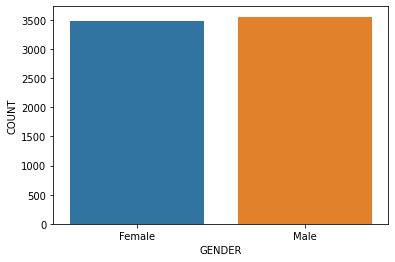


 ########## PARTNER ##########
     PARTNER  RATIO (%)
No      3641     51.700
Yes     3402     48.300


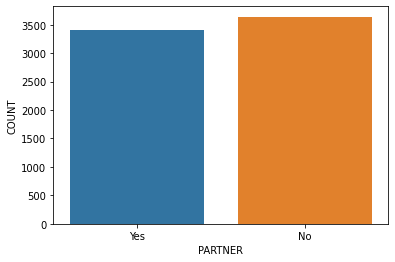


 ########## DEPENDENTS ##########
     DEPENDENTS  RATIO (%)
No         4933     70.040
Yes        2110     29.960


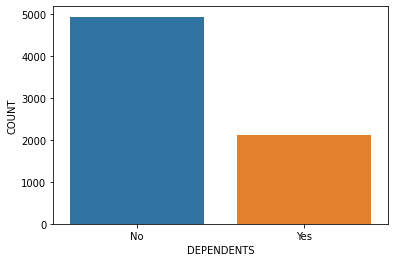


 ########## PHONESERVICE ##########
     PHONESERVICE  RATIO (%)
Yes          6361     90.320
No            682      9.680


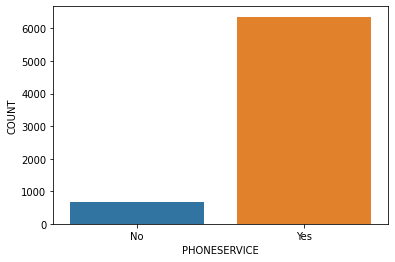


 ########## MULTIPLELINES ##########
                  MULTIPLELINES  RATIO (%)
No                         3390     48.130
Yes                        2971     42.180
No phone service            682      9.680


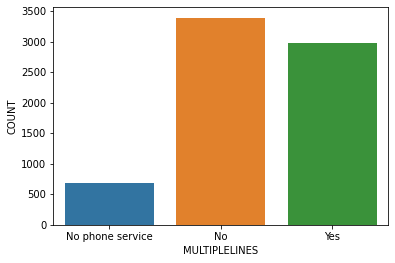


 ########## INTERNETSERVICE ##########
             INTERNETSERVICE  RATIO (%)
Fiber optic             3096     43.960
DSL                     2421     34.370
No                      1526     21.670


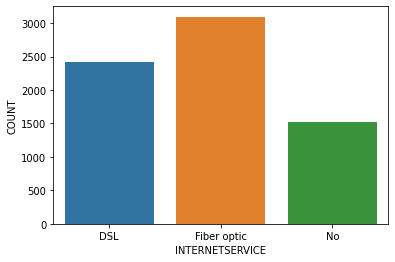


 ########## ONLINESECURITY ##########
                     ONLINESECURITY  RATIO (%)
No                             3498     49.670
Yes                            2019     28.670
No internet service            1526     21.670


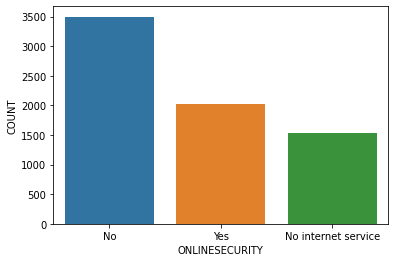


 ########## ONLINEBACKUP ##########
                     ONLINEBACKUP  RATIO (%)
No                           3088     43.840
Yes                          2429     34.490
No internet service          1526     21.670


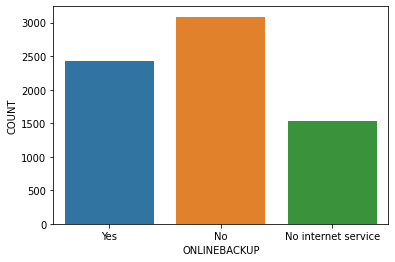


 ########## DEVICEPROTECTION ##########
                     DEVICEPROTECTION  RATIO (%)
No                               3095     43.940
Yes                              2422     34.390
No internet service              1526     21.670


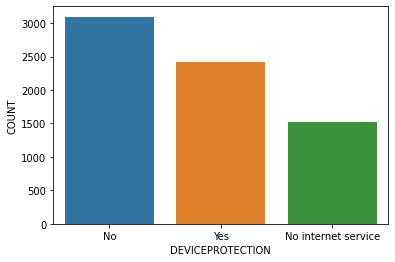


 ########## TECHSUPPORT ##########
                     TECHSUPPORT  RATIO (%)
No                          3473     49.310
Yes                         2044     29.020
No internet service         1526     21.670


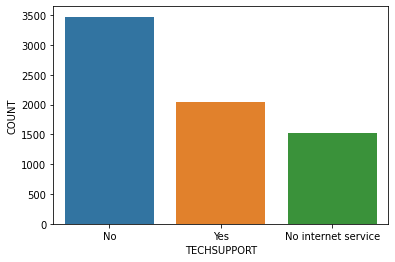


 ########## STREAMINGTV ##########
                     STREAMINGTV  RATIO (%)
No                          2810     39.900
Yes                         2707     38.440
No internet service         1526     21.670


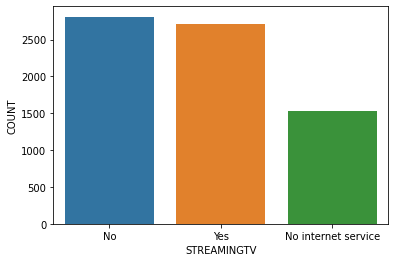


 ########## STREAMINGMOVIES ##########
                     STREAMINGMOVIES  RATIO (%)
No                              2785     39.540
Yes                             2732     38.790
No internet service             1526     21.670


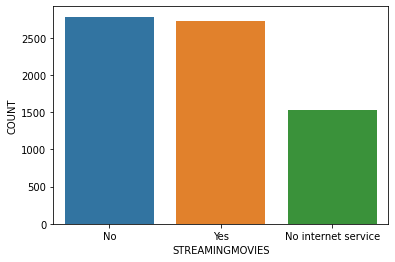


 ########## CONTRACT ##########
                CONTRACT  RATIO (%)
Month-to-month      3875     55.020
Two year            1695     24.070
One year            1473     20.910


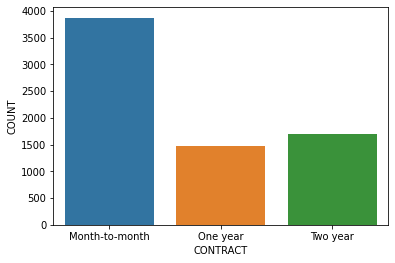


 ########## PAPERLESSBILLING ##########
     PAPERLESSBILLING  RATIO (%)
Yes              4171     59.220
No               2872     40.780


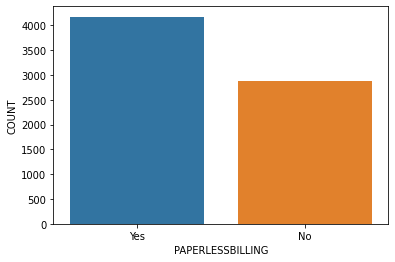


 ########## PAYMENTMETHOD ##########
                           PAYMENTMETHOD  RATIO (%)
Electronic check                    2365     33.580
Mailed check                        1612     22.890
Bank transfer (automatic)           1544     21.920
Credit card (automatic)             1522     21.610


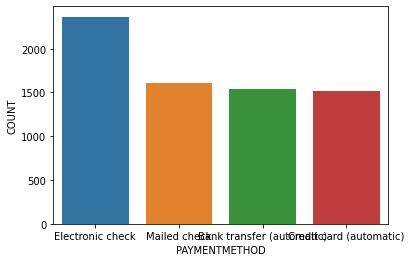


 ########## SENIORCITIZEN ##########
   SENIORCITIZEN  RATIO (%)
0           5901     83.790
1           1142     16.210


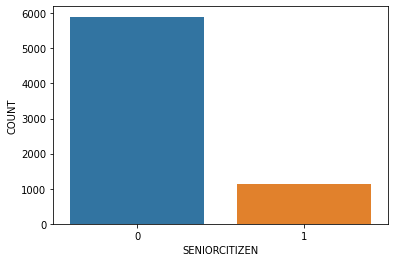


 ########## CHURN ##########
   CHURN  RATIO (%)
0   5174     73.460
1   1869     26.540


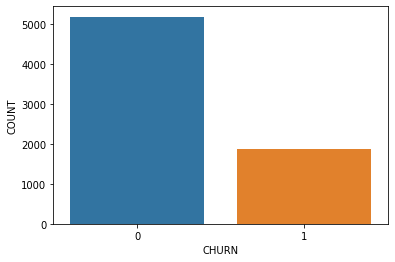

In [13]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

## Let's analyse the numerical variables

In [14]:
def num_summary(dataframe, numerical_col, plot=False):
    """
    for col in num_cols:
        num_summary(df, col, plot=True)
    """
    print('#' * 10, numerical_col.upper(), '#' * 10)
    print(pd.DataFrame({
        numerical_col.upper(): round(dataframe[numerical_col].describe().T, 2)
    }))

    if plot:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        sns.boxplot(y=dataframe[numerical_col])
        plt.ylabel(numerical_col.upper())
        plt.subplot(1, 2, 2)
        sns.histplot(x=dataframe[numerical_col])
        plt.xlabel(numerical_col.upper())
        plt.show(block=True)

########## TENURE ##########
        TENURE
count 7043.000
mean    32.370
std     24.560
min      0.000
25%      9.000
50%     29.000
75%     55.000
max     72.000


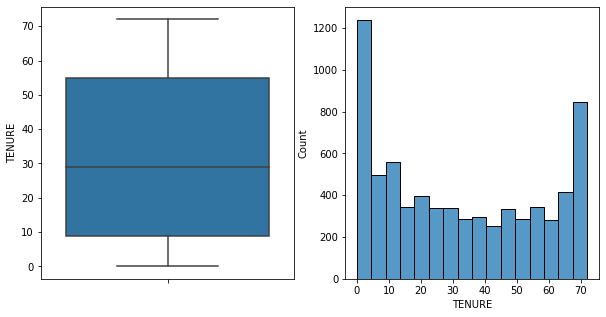

########## MONTHLYCHARGES ##########
       MONTHLYCHARGES
count        7043.000
mean           64.760
std            30.090
min            18.250
25%            35.500
50%            70.350
75%            89.850
max           118.750


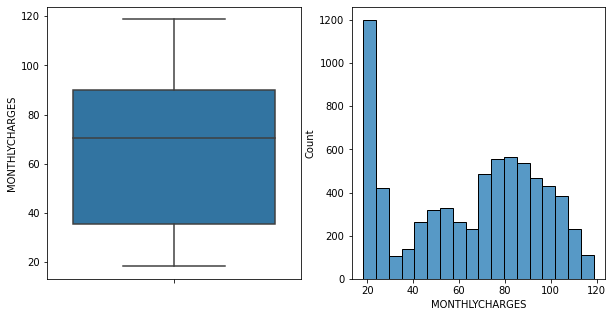

########## TOTALCHARGES ##########
       TOTALCHARGES
count      7032.000
mean       2283.300
std        2266.770
min          18.800
25%         401.450
50%        1397.480
75%        3794.740
max        8684.800


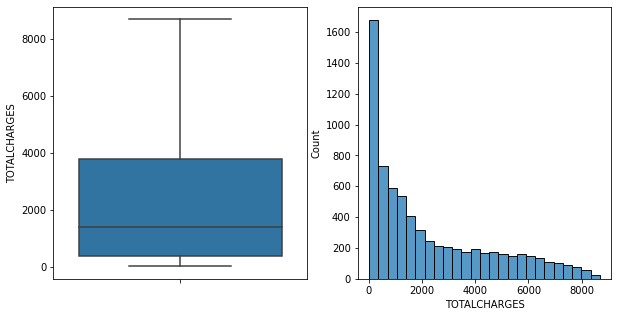

In [15]:
for col in num_cols:
    num_summary(df, col, plot=True)

## Let's analyse the target variable with categorical variables

In [16]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print('\n', '#' * 10, categorical_col.upper(), '#' * 10)
    print(pd.DataFrame({
        'TARGET_MEAN': round(dataframe.groupby(categorical_col)[target].mean(), 2)
    }), end='\n\n')

    if plot:
        sns.barplot(x=dataframe[categorical_col], y=dataframe[target])
        plt.xlabel(categorical_col.upper())
        plt.ylabel(target.upper())
        plt.show(block=True)


 ########## GENDER ##########
        TARGET_MEAN
gender             
Female        0.270
Male          0.260



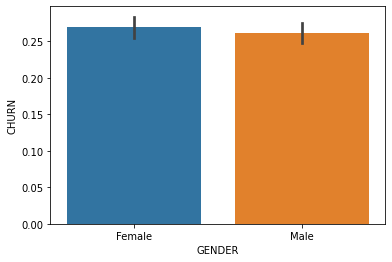


 ########## PARTNER ##########
         TARGET_MEAN
partner             
No             0.330
Yes            0.200



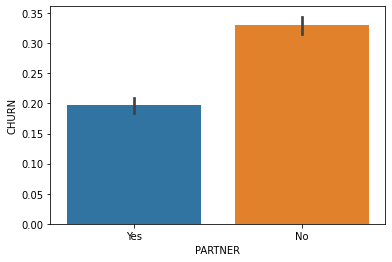


 ########## DEPENDENTS ##########
            TARGET_MEAN
dependents             
No                0.310
Yes               0.150



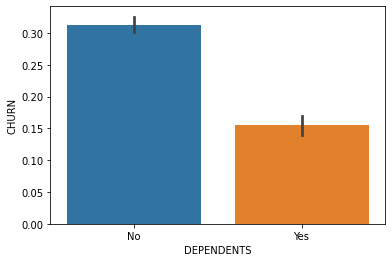


 ########## PHONESERVICE ##########
              TARGET_MEAN
phoneservice             
No                  0.250
Yes                 0.270



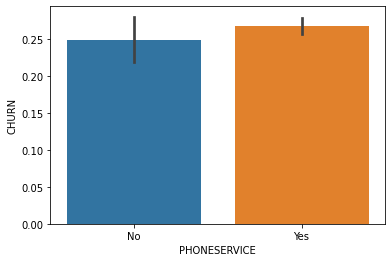


 ########## MULTIPLELINES ##########
                  TARGET_MEAN
multiplelines                
No                      0.250
No phone service        0.250
Yes                     0.290



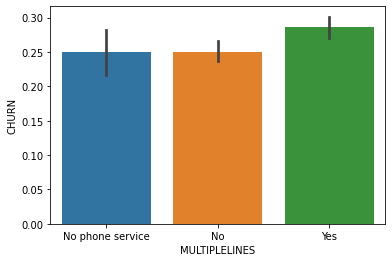


 ########## INTERNETSERVICE ##########
                 TARGET_MEAN
internetservice             
DSL                    0.190
Fiber optic            0.420
No                     0.070



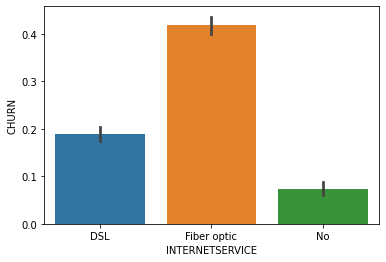


 ########## ONLINESECURITY ##########
                     TARGET_MEAN
onlinesecurity                  
No                         0.420
No internet service        0.070
Yes                        0.150



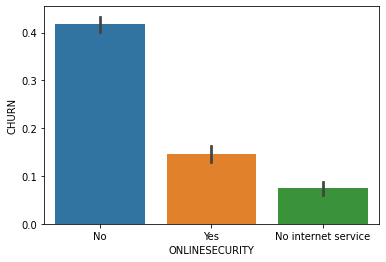


 ########## ONLINEBACKUP ##########
                     TARGET_MEAN
onlinebackup                    
No                         0.400
No internet service        0.070
Yes                        0.220



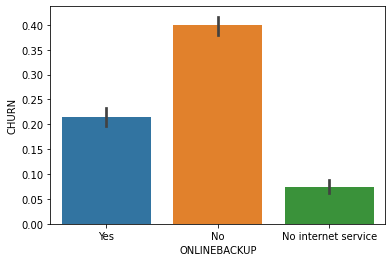


 ########## DEVICEPROTECTION ##########
                     TARGET_MEAN
deviceprotection                
No                         0.390
No internet service        0.070
Yes                        0.230



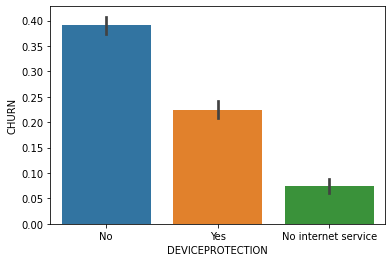


 ########## TECHSUPPORT ##########
                     TARGET_MEAN
techsupport                     
No                         0.420
No internet service        0.070
Yes                        0.150



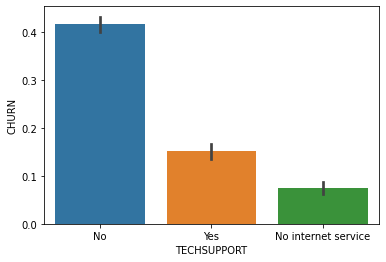


 ########## STREAMINGTV ##########
                     TARGET_MEAN
streamingtv                     
No                         0.340
No internet service        0.070
Yes                        0.300



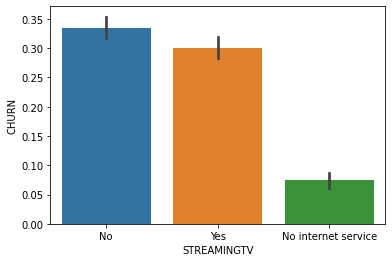


 ########## STREAMINGMOVIES ##########
                     TARGET_MEAN
streamingmovies                 
No                         0.340
No internet service        0.070
Yes                        0.300



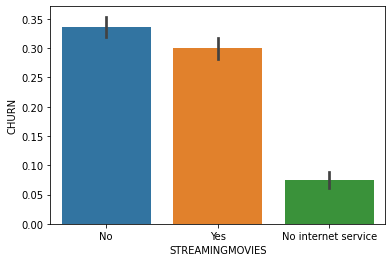


 ########## CONTRACT ##########
                TARGET_MEAN
contract                   
Month-to-month        0.430
One year              0.110
Two year              0.030



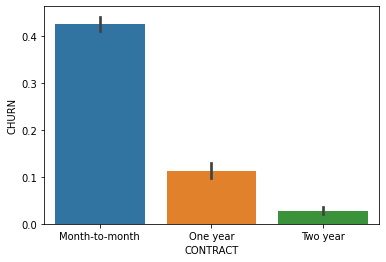


 ########## PAPERLESSBILLING ##########
                  TARGET_MEAN
paperlessbilling             
No                      0.160
Yes                     0.340



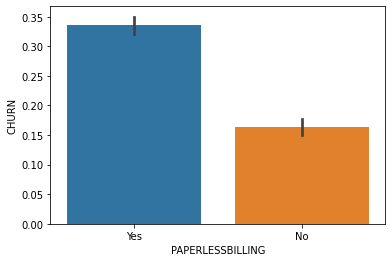


 ########## PAYMENTMETHOD ##########
                           TARGET_MEAN
paymentmethod                         
Bank transfer (automatic)        0.170
Credit card (automatic)          0.150
Electronic check                 0.450
Mailed check                     0.190



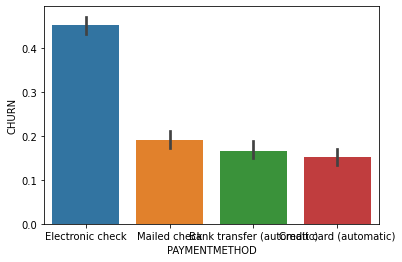


 ########## SENIORCITIZEN ##########
               TARGET_MEAN
seniorcitizen             
0                    0.240
1                    0.420



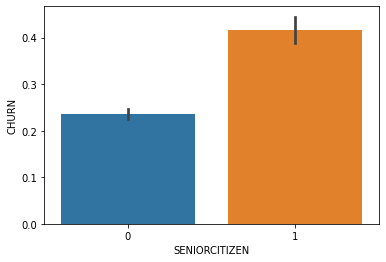

In [17]:
cat_cols = [col for col in cat_cols if 'churn' not in col]
for col in cat_cols:
    target_summary_with_cat(df, 'churn', col, plot=True)

## Let's analyse the target variable with numerical variables

In [18]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n")

    if plot:
        sns.barplot(x=dataframe[target], y=dataframe[numerical_col])
        plt.ylabel(numerical_col.upper())
        plt.xlabel(target.upper())
        plt.show(block=True)

       tenure
churn        
0      37.570
1      17.979



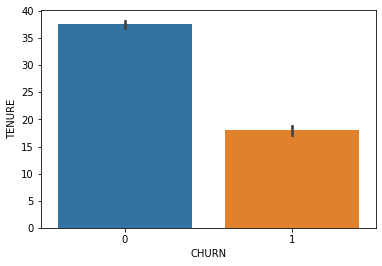

       monthlycharges
churn                
0              61.265
1              74.441



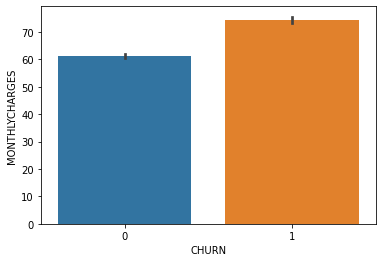

       totalcharges
churn              
0          2555.344
1          1531.796



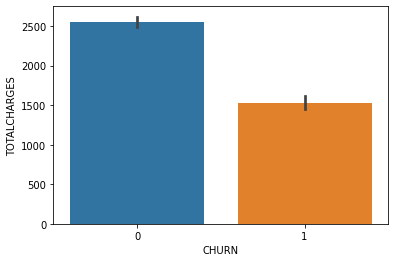

In [19]:
for col in num_cols:
    target_summary_with_num(df,'churn', col, plot=True)

## Let's define a function giving the high correlated columns

In [20]:
def high_correlated_cols(dataframe, corr_th=0.90, plot=False):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    if plot:
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, cmap='RdBu', annot=True, annot_kws={'fontsize': 12})
        plt.show(block=True)

    return drop_list

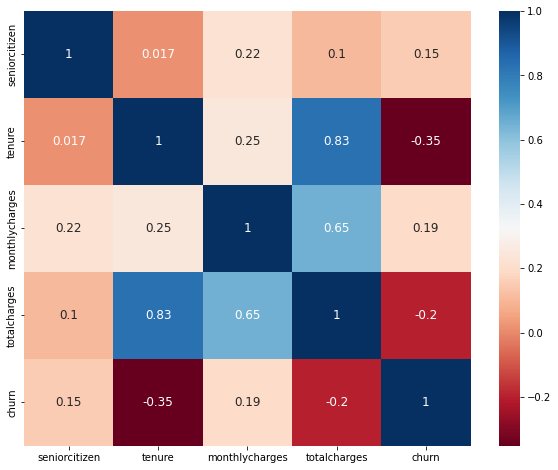

[]

In [21]:
high_correlated_cols(df, plot=True)    # variables to be removed

### You see that there is no columns to be deleted as there is no correlation higher than 0.90, which is a threshold value I determined. 

# Modeling before feature extraction and hyperparameter optimization

### Let's drop the missing values

In [22]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 


### Let's check the ordinality between the categorical columns

In [23]:
def ordinal_columns(dataframe, variable):
    print(dataframe[variable].value_counts())

In [24]:
cat_cols = [col for col in cat_cols if 'churn' not in col]
for col in cat_cols:
    print('--'*50)
    ordinal_columns(df, col)

----------------------------------------------------------------------------------------------------
Male      3549
Female    3483
Name: gender, dtype: int64
----------------------------------------------------------------------------------------------------
No     3639
Yes    3393
Name: partner, dtype: int64
----------------------------------------------------------------------------------------------------
No     4933
Yes    2099
Name: dependents, dtype: int64
----------------------------------------------------------------------------------------------------
Yes    6352
No      680
Name: phoneservice, dtype: int64
----------------------------------------------------------------------------------------------------
No                  3385
Yes                 2967
No phone service     680
Name: multiplelines, dtype: int64
----------------------------------------------------------------------------------------------------
Fiber optic    3096
DSL            2416
No             1520
Name

### As you see that there is no ordinality between the categorical clumns. Therefore, we can handle the whole categorical variables including binary columns using one hot encoder.

## Let's use one hot encoding

In [25]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [26]:
dff = df.copy()
dff = one_hot_encoder(dff, cat_cols, drop_first=True)
dff.head()

,customerid,tenure,monthlycharges,totalcharges,churn,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,seniorcitizen_1
0,7590-VHVEG,1,29.850,29.850,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,34,56.950,1889.500,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,2,53.850,108.150,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,7795-CFOCW,45,42.300,1840.750,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,2,70.700,151.650,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


## Now, let's scale the numerical variables using StandardScaler method

In [27]:
standard_scaler = StandardScaler()
dff = dff.drop('customerid', axis=1)
dff[num_cols] = standard_scaler.fit_transform(dff[num_cols])
dff.head()

,tenure,monthlycharges,totalcharges,churn,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,seniorcitizen_1
0,-1.280,-1.162,-0.994,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0.064,-0.261,-0.174,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-1.240,-0.364,-0.960,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.512,-0.748,-0.195,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,-1.240,0.196,-0.940,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


### Let's pick the independent and dependent variables

In [28]:
X = dff.drop('churn', axis=1)
y = dff['churn']

## Let's predict whether a customer is churn or not

### Let's call the models used

In [29]:
logistic_model = LogisticRegression().fit(X, y)
cat_boost_model = CatBoostClassifier(verbose=False).fit(X, y)
xgboost_model = XGBClassifier(use_label_encoder=False).fit(X, y)
gbm_model = GradientBoostingClassifier().fit(X, y)
lgbm_model = LGBMClassifier().fit(X, y)
rf_model = RandomForestClassifier().fit(X, y)
cart_model = DecisionTreeClassifier().fit(X, y)

### Logistic regression model

In [30]:
# Logostic regression model
cv_results_logistic = cross_validate(logistic_model, X, y, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
print('Accuracy:', cv_results_logistic['test_accuracy'].mean())
print('F1 Score:', cv_results_logistic['test_f1'].mean())
print('Recall:', cv_results_logistic['test_recall'].mean())
print('Precision:', cv_results_logistic['test_precision'].mean())
print('Roc Auc Score:', cv_results_logistic['test_roc_auc'].mean())

Accuracy: 0.8038968543902755
F1 Score: 0.5983590411094065
Recall: 0.550552009660169
Precision: 0.6560929687008583
Roc Auc Score: 0.845213540524272


### CatBoost model

In [31]:
# CatBoost model
cv_results_catboost = cross_validate(cat_boost_model, X, y, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
print('Accuracy:', cv_results_catboost['test_accuracy'].mean())
print('F1 Score:', cv_results_catboost['test_f1'].mean())
print('Recall:', cv_results_catboost['test_recall'].mean())
print('Precision:', cv_results_catboost['test_precision'].mean())
print('Roc Auc Score:', cv_results_catboost['test_roc_auc'].mean())

Accuracy: 0.7992022824259666
F1 Score: 0.5775221354010435
Recall: 0.5163072853774942
Precision: 0.6565382788213955
Roc Auc Score: 0.8412856584836845


### XGBoost model

In [32]:
# XGBoost model
cv_results_xgboost = cross_validate(xgboost_model, X, y, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
print('Accuracy:', cv_results_xgboost['test_accuracy'].mean())
print('F1 Score:', cv_results_xgboost['test_f1'].mean())
print('Recall:', cv_results_xgboost['test_recall'].mean())
print('Precision:', cv_results_xgboost['test_precision'].mean())
print('Roc Auc Score:', cv_results_xgboost['test_roc_auc'].mean())

Accuracy: 0.7868336189059872
F1 Score: 0.5592689730415901
Recall: 0.5088062791098844
Precision: 0.6227760648364572
Roc Auc Score: 0.8246766766604507


### Gradient Boosting model

In [33]:
# GBM model
cv_results_gbm = cross_validate(gbm_model, X, y, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
print('Accuracy:', cv_results_gbm['test_accuracy'].mean())
print('F1 Score:', cv_results_gbm['test_f1'].mean())
print('Recall:', cv_results_gbm['test_recall'].mean())
print('Precision:', cv_results_gbm['test_precision'].mean())
print('Roc Auc Score:', cv_results_gbm['test_roc_auc'].mean())

Accuracy: 0.8061709960558645
F1 Score: 0.5917595382424646
Recall: 0.5286096256684493
Precision: 0.6731110306172982
Roc Auc Score: 0.8473666567610572


### Light GBM

In [34]:
# LGBM model
cv_results_lgbm = cross_validate(lgbm_model, X, y, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
print('Accuracy:', cv_results_lgbm['test_accuracy'].mean())
print('F1 Score:', cv_results_lgbm['test_f1'].mean())
print('Recall:', cv_results_lgbm['test_recall'].mean())
print('Precision:', cv_results_lgbm['test_precision'].mean())
print('Roc Auc Score:', cv_results_lgbm['test_roc_auc'].mean())

Accuracy: 0.7962160949825423
F1 Score: 0.5785111316107152
Recall: 0.5259387039273188
Precision: 0.6439687546904187
Roc Auc Score: 0.8360484503243437


### Random forest model

In [35]:
# Random forest model
cv_results_rf = cross_validate(rf_model, X, y, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
print('Accuracy:', cv_results_rf['test_accuracy'].mean())
print('F1 Score:', cv_results_rf['test_f1'].mean())
print('Recall:', cv_results_rf['test_recall'].mean())
print('Precision:', cv_results_rf['test_precision'].mean())
print('Roc Auc Score:', cv_results_rf['test_roc_auc'].mean())

Accuracy: 0.7923750080822449
F1 Score: 0.5525432318356673
Recall: 0.4820711862457593
Precision: 0.6478083322768343
Roc Auc Score: 0.8251624614875365


### Decision tree model

In [36]:
# Decision tree model
cv_results_cart = cross_validate(cart_model, X, y, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
print('Accuracy:', cv_results_cart['test_accuracy'].mean())
print('F1 Score:', cv_results_cart['test_f1'].mean())
print('Recall:', cv_results_cart['test_recall'].mean())
print('Precision:', cv_results_cart['test_precision'].mean())
print('Roc Auc Score:', cv_results_cart['test_roc_auc'].mean())

Accuracy: 0.7282419904952799
F1 Score: 0.5004243515724291
Recall: 0.5125754700707262
Precision: 0.48965084674863313
Roc Auc Score: 0.6607243699093351


### According to the results without feature engineering and hyperparameter optimization, the best model is Gradient Boosting Model based on the accuracy, f1 score, recall, precision, and roc auc value

### Let's check the feature importance

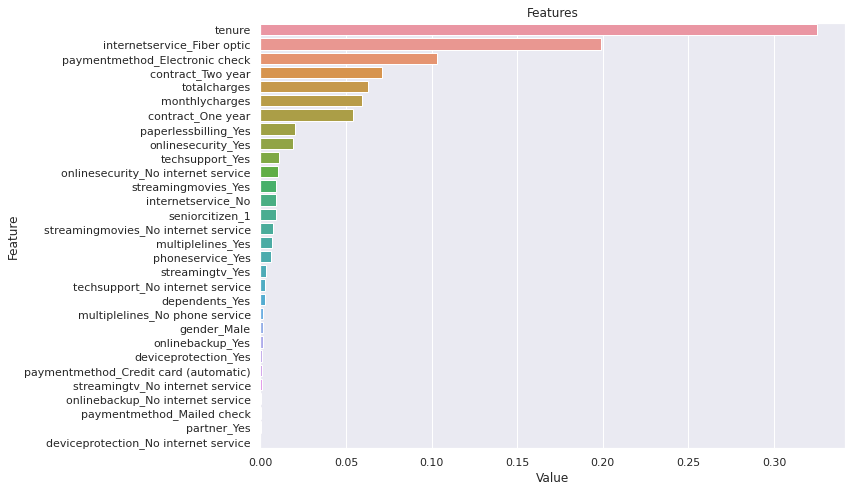

In [37]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(12, 7))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(gbm_model, X)

# Feature engineering

In [38]:
# gender_seniorcitizen
df.loc[(df['gender'] == 'Male') & (df['seniorcitizen'] == 0), 'gender_seniorcitizen'] = 'young_male'
df.loc[(df['gender'] == 'Male') & (df['seniorcitizen'] == 1), 'gender_seniorcitizen'] = 'senior_male'
df.loc[(df['gender'] == 'Female') & (df['seniorcitizen'] == 0), 'gender_seniorcitizen'] = 'young_female'
df.loc[(df['gender'] == 'Female') & (df['seniorcitizen'] == 1), 'gender_seniorcitizen'] = 'senior_female'

In [39]:
# gender_partner
df.loc[(df['gender'] == 'Male') & (df['partner'] == 'No'), 'gender_partner'] = 'male_no'
df.loc[(df['gender'] == 'Male') & (df['partner'] == 'Yes'), 'gender_partner'] = 'male_yes'
df.loc[(df['gender'] == 'Female') & (df['partner'] == 'No'), 'gender_partner'] = 'female_no'
df.loc[(df['gender'] == 'Female') & (df['partner'] == 'Yes'), 'gender_partner'] = 'female_yes'

In [40]:
# new tenure year
df.loc[(df.tenure >= 0) & (df.tenure <= 12), 'new_tenure_year'] = '0-1 year'
df.loc[(df.tenure > 12) & (df.tenure <= 24), 'new_tenure_year'] = '1-2 year'
df.loc[(df.tenure > 24) & (df.tenure <= 36), 'new_tenure_year'] = '2-3 year'
df.loc[(df.tenure > 36) & (df.tenure <= 48), 'new_tenure_year'] = '3-4 year'
df.loc[(df.tenure > 48) & (df.tenure <= 60), 'new_tenure_year'] = '4-5 year'
df.loc[(df.tenure > 60) & (df.tenure <= 72), 'new_tenure_year'] = '5-6 year'

In [41]:
# mean mothly fee
df['mean_monthly_fee'] = df['totalcharges'] / (df['tenure'] + 1)

In [42]:
# increase in current price relative to average price
df['increase'] = df['mean_monthly_fee'] / (df['monthlycharges'] + 1)

In [43]:
# total number of services received by the person
df['totalservices'] = (df[['phoneservice', 'internetservice', 'onlinesecurity',
                               'onlinebackup', 'deviceprotection', 'techsupport',
                               'streamingtv', 'streamingmovies']] == 'Yes').sum(axis=1)

In [44]:
# charge per service
df['charge_per_service'] = df["monthlycharges"] / (df['totalservices'] + 1)

In [45]:
# gender_payment method
df.loc[(df['gender'] == 'Male') & (df['paymentmethod'] == 'Electronic check'), 'gender_payment_method'] = 'male_electronic'
df.loc[(df['gender'] == 'Male') & (df['paymentmethod'] == 'Mailed check'), 'gender_payment_method'] = 'male_mail'
df.loc[(df['gender'] == 'Male') & (df['paymentmethod'] == 'Bank transfer (automatic)'), 'gender_payment_method'] = 'male_bank'
df.loc[(df['gender'] == 'Male') & (df['paymentmethod'] == 'Credit card (automatic)'), 'gender_payment_method'] = 'male_credit_card'

df.loc[(df['gender'] == 'Female') & (df['paymentmethod'] == 'Electronic check'), 'gender_payment_method'] = 'female_electronic'
df.loc[(df['gender'] == 'Female') & (df['paymentmethod'] == 'Mailed check'), 'gender_payment_method'] = 'female_mail'
df.loc[(df['gender'] == 'Female') & (df['paymentmethod'] == 'Bank transfer (automatic)'), 'gender_payment_method'] = 'female_bank'
df.loc[(df['gender'] == 'Female') & (df['paymentmethod'] == 'Credit card (automatic)'), 'gender_payment_method'] = 'female_credit_card'

In [46]:
# seniorcitizen_payment method
df.loc[(df['seniorcitizen'] == 0) & (df['paymentmethod'] == 'Electronic check'), 'seniorcitizen_payment_method'] = 'young_electronic'
df.loc[(df['seniorcitizen'] == 0) & (df['paymentmethod'] == 'Mailed check'), 'seniorcitizen_payment_method'] = 'young_mail'
df.loc[(df['seniorcitizen'] == 0) & (df['paymentmethod'] == 'Bank transfer (automatic)'), 'seniorcitizen_payment_method'] = 'young_bank'
df.loc[(df['seniorcitizen'] == 0) & (df['paymentmethod'] == 'Credit card (automatic)'), 'seniorcitizen_payment_method'] = 'young_credit_card'

df.loc[(df['seniorcitizen'] == 1) & (df['paymentmethod'] == 'Electronic check'), 'seniorcitizen_payment_method'] = 'old_electronic'
df.loc[(df['seniorcitizen'] == 1) & (df['paymentmethod'] == 'Mailed check'), 'seniorcitizen_payment_method'] = 'old_mail'
df.loc[(df['seniorcitizen'] == 1) & (df['paymentmethod'] == 'Bank transfer (automatic)'), 'seniorcitizen_payment_method'] = 'old_bank'
df.loc[(df['seniorcitizen'] == 1) & (df['paymentmethod'] == 'Credit card (automatic)'), 'seniorcitizen_payment_method'] = 'old_credit_card'

In [47]:
# internetservice_paperlessbilling
df.loc[(df['internetservice'] == 'Fiber optic') & (df['paperlessbilling'] == 'Yes'), 'internetservice_paperlessbilling'] = 'fiber_yes'
df.loc[(df['internetservice'] == 'DSL') & (df['paperlessbilling'] == 'Yes'), 'internetservice_paperlessbilling'] = 'dsl_yes'
df.loc[(df['internetservice'] == 'No') & (df['paperlessbilling'] == 'Yes'), 'internetservice_paperlessbilling'] = 'no_yes'

df.loc[(df['internetservice'] == 'Fiber optic') & (df['paperlessbilling'] == 'No'), 'internetservice_paperlessbilling'] = 'fiber_no'
df.loc[(df['internetservice'] == 'DSL') & (df['paperlessbilling'] == 'No'), 'internetservice_paperlessbilling'] = 'dsl_no'
df.loc[(df['internetservice'] == 'No') & (df['paperlessbilling'] == 'No'), 'internetservice_paperlessbilling'] = 'no_no'

In [48]:
# multiplelines_paperlessbilling
df.loc[(df['multiplelines'] == 'No') & (df['paperlessbilling'] == 'Yes'), 'multiplelines_paperlessbilling'] = 'no_yes'
df.loc[(df['multiplelines'] == 'Yes') & (df['paperlessbilling'] == 'Yes'), 'multiplelines_paperlessbilling'] = 'yes_yes'
df.loc[(df['multiplelines'] == 'No phone service') & (df['paperlessbilling'] == 'Yes'), 'multiplelines_paperlessbilling'] = 'no_phone_yes'

df.loc[(df['multiplelines'] == 'No') & (df['paperlessbilling'] == 'No'), 'multiplelines_paperlessbilling'] = 'no_no'
df.loc[(df['multiplelines'] == 'Yes') & (df['paperlessbilling'] == 'No'), 'multiplelines_paperlessbilling'] = 'no_no'
df.loc[(df['multiplelines'] == 'No phone service') & (df['paperlessbilling'] == 'No'), 'multiplelines_paperlessbilling'] = 'no_phone_no'

In [49]:
# gender_contract
df.loc[(df['gender'] == 'Male') & (df['contract'] == 'Month-to-month'), 'gender_contract'] = 'male_month'
df.loc[(df['gender'] == 'Male') & (df['contract'] == 'One year'), 'gender_contract'] = 'male_one_year'
df.loc[(df['gender'] == 'Male') & (df['contract'] == 'Two year'), 'gender_contract'] = 'male_two_year'

df.loc[(df['gender'] == 'Female') & (df['contract'] == 'Month-to-month'), 'gender_contract'] = 'female_month'
df.loc[(df['gender'] == 'Female') & (df['contract'] == 'One year'), 'gender_contract'] = 'female_one_year'
df.loc[(df['gender'] == 'Female') & (df['contract'] == 'Two year'), 'gender_contract'] = 'female_two_year'

In [50]:
# seniorcitizen_contract
df.loc[(df['seniorcitizen'] == 0) & (df['contract'] == 'Month-to-month'), 'seniorcitizen_contract'] = 'young_month'
df.loc[(df['seniorcitizen'] == 0) & (df['contract'] == 'One year'), 'seniorcitizen_contract'] = 'young_one_year'
df.loc[(df['seniorcitizen'] == 0) & (df['contract'] == 'Two year'), 'seniorcitizen_contract'] = 'young_two_year'

df.loc[(df['seniorcitizen'] == 1) & (df['contract'] == 'Month-to-month'), 'seniorcitizen_contract'] = 'old_month'
df.loc[(df['seniorcitizen'] == 1) & (df['contract'] == 'One year'), 'seniorcitizen_contract'] = 'old_one_year'
df.loc[(df['seniorcitizen'] == 1) & (df['contract'] == 'Two year'), 'seniorcitizen_contract'] = 'old_two_year'

# Modeling after feature engineering

In [51]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 7032
Variables: 34
cat_cols: 27
num_cols: 6
cat_but_car: 1
num_but_cat: 3


In [52]:
cat_cols = [col for col in cat_cols if col not in 'churn']
cat_cols

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'gender_seniorcitizen',
 'gender_partner',
 'new_tenure_year',
 'gender_payment_method',
 'seniorcitizen_payment_method',
 'internetservice_paperlessbilling',
 'multiplelines_paperlessbilling',
 'gender_contract',
 'seniorcitizen_contract',
 'seniorcitizen',
 'totalservices']

In [53]:
num_cols

['tenure',
 'monthlycharges',
 'totalcharges',
 'mean_monthly_fee',
 'increase',
 'charge_per_service']

In [54]:
cat_but_car

['customerid']

## One hot encoding

In [55]:
df_new = df.copy()
df_new = one_hot_encoder(df_new, cat_cols, drop_first=True)
df_new.head()

,customerid,tenure,monthlycharges,totalcharges,churn,mean_monthly_fee,increase,charge_per_service,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,gender_seniorcitizen_senior_male,gender_seniorcitizen_young_female,gender_seniorcitizen_young_male,gender_partner_female_yes,gender_partner_male_no,gender_partner_male_yes,new_tenure_year_1-2 year,new_tenure_year_2-3 year,new_tenure_year_3-4 year,new_tenure_year_4-5 year,new_tenure_year_5-6 year,gender_payment_method_female_credit_card,gender_payment_method_female_electronic,gender_payment_method_female_mail,gender_payment_method_male_bank,gender_payment_method_male_credit_card,gender_payment_method_male_electronic,gender_payment_method_male_mail,seniorcitizen_payment_method_old_credit_card,seniorcitizen_payment_method_old_electronic,seniorcitizen_payment_method_old_mail,seniorcitizen_payment_method_young_bank,seniorcitizen_payment_method_young_credit_card,seniorcitizen_payment_method_young_electronic,seniorcitizen_payment_method_young_mail,internetservice_paperlessbilling_dsl_yes,internetservice_paperlessbilling_fiber_no,internetservice_paperlessbilling_fiber_yes,internetservice_paperlessbilling_no_no,internetservice_paperlessbilling_no_yes,multiplelines_paperlessbilling_no_phone_no,multiplelines_paperlessbilling_no_phone_yes,multiplelines_paperlessbilling_no_yes,multiplelines_paperlessbilling_yes_yes,gender_contract_female_one_year,gender_contract_female_two_year,gender_contract_male_month,gender_contract_male_one_year,gender_contract_male_two_year,seniorcitizen_contract_old_one_year,seniorcitizen_contract_old_two_year,seniorcitizen_contract_young_month,seniorcitizen_contract_young_one_year,seniorcitizen_contract_young_two_year,seniorcitizen_1,totalservices_1,totalservices_2,totalservices_3,totalservices_4,totalservices_5,totalservices_6,totalservices_7
0,7590-VHVEG,1,29.850,29.850,0,14.925,0.484,14.925,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,5575-GNVDE,34,56.950,1889.500,0,53.986,0.932,14.238,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,3668-QPYBK,2,53.850,108.150,1,36.050,0.657,13.463,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,7795-CFOCW,45,42.300,1840.750,0,40.016,0.924,10.575,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,2,70.700,151.650,1,50.550,0.705,35.350,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


## Standardization using StandardScaler method

In [56]:
standard_scaler = StandardScaler()
df_new = df_new.drop('customerid', axis=1)
df_new[num_cols] = standard_scaler.fit_transform(df_new[num_cols])
df_new.head()

,tenure,monthlycharges,totalcharges,churn,mean_monthly_fee,increase,charge_per_service,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,gender_seniorcitizen_senior_male,gender_seniorcitizen_young_female,gender_seniorcitizen_young_male,gender_partner_female_yes,gender_partner_male_no,gender_partner_male_yes,new_tenure_year_1-2 year,new_tenure_year_2-3 year,new_tenure_year_3-4 year,new_tenure_year_4-5 year,new_tenure_year_5-6 year,gender_payment_method_female_credit_card,gender_payment_method_female_electronic,gender_payment_method_female_mail,gender_payment_method_male_bank,gender_payment_method_male_credit_card,gender_payment_method_male_electronic,gender_payment_method_male_mail,seniorcitizen_payment_method_old_credit_card,seniorcitizen_payment_method_old_electronic,seniorcitizen_payment_method_old_mail,seniorcitizen_payment_method_young_bank,seniorcitizen_payment_method_young_credit_card,seniorcitizen_payment_method_young_electronic,seniorcitizen_payment_method_young_mail,internetservice_paperlessbilling_dsl_yes,internetservice_paperlessbilling_fiber_no,internetservice_paperlessbilling_fiber_yes,internetservice_paperlessbilling_no_no,internetservice_paperlessbilling_no_yes,multiplelines_paperlessbilling_no_phone_no,multiplelines_paperlessbilling_no_phone_yes,multiplelines_paperlessbilling_no_yes,multiplelines_paperlessbilling_yes_yes,gender_contract_female_one_year,gender_contract_female_two_year,gender_contract_male_month,gender_contract_male_one_year,gender_contract_male_two_year,seniorcitizen_contract_old_one_year,seniorcitizen_contract_old_two_year,seniorcitizen_contract_young_month,seniorcitizen_contract_young_one_year,seniorcitizen_contract_young_two_year,seniorcitizen_1,totalservices_1,totalservices_2,totalservices_3,totalservices_4,totalservices_5,totalservices_6,totalservices_7
0,-1.280,-1.162,-0.994,0,-1.447,-2.676,-0.313,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0.064,-0.261,-0.174,0,-0.167,0.348,-0.412,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,-1.240,-0.364,-0.960,1,-0.755,-1.505,-0.523,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0.512,-0.748,-0.195,0,-0.625,0.298,-0.940,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,-1.240,0.196,-0.940,1,-0.280,-1.182,2.634,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


## Let's select the independent and dependent variables again

In [57]:
X_new = df_new.drop('churn', axis=1)
y_new = df_new['churn']

## Let's predict whether a customer is churn or not after the feature engineering

### Let's call the models used again

In [58]:
logistic_model = LogisticRegression()
cat_boost_model = CatBoostClassifier(verbose=False)
xgboost_model = XGBClassifier(use_label_encoder=False)
gbm_model = GradientBoostingClassifier()
lgbm_model = LGBMClassifier()
rf_model = RandomForestClassifier()
cart_model = DecisionTreeClassifier()

### Logistic regression model

In [59]:
# Logistic regression model
cv_results_logistic = cross_validate(logistic_model, X_new, y_new, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
print('Accuracy:', cv_results_logistic['test_accuracy'].mean())
print('F1 Score:', cv_results_logistic['test_f1'].mean())
print('Recall:', cv_results_logistic['test_recall'].mean())
print('Precision:', cv_results_logistic['test_precision'].mean())
print('Roc Auc Score:', cv_results_logistic['test_roc_auc'].mean())

Accuracy: 0.8051756675934308
F1 Score: 0.5950379470895799
Recall: 0.5387758035765626
Precision: 0.6660906058731937
Roc Auc Score: 0.8494137417604641


### CatBoost model

In [60]:
# CatBoost model
cv_results_catboost = cross_validate(cat_boost_model, X_new, y_new, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
print('Accuracy:', cv_results_catboost['test_accuracy'].mean())
print('F1 Score:', cv_results_catboost['test_f1'].mean())
print('Recall:', cv_results_catboost['test_recall'].mean())
print('Precision:', cv_results_catboost['test_precision'].mean())
print('Roc Auc Score:', cv_results_catboost['test_roc_auc'].mean())

Accuracy: 0.799203090650459
F1 Score: 0.5781135872512995
Recall: 0.5173739290437582
Precision: 0.6557799391281028
Roc Auc Score: 0.8415892116330627


### XGBoost model

In [61]:
# XGBoost model
cv_results_xgboost = cross_validate(xgboost_model, X_new, y_new, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
print('Accuracy:', cv_results_xgboost['test_accuracy'].mean())
print('F1 Score:', cv_results_xgboost['test_f1'].mean())
print('Recall:', cv_results_xgboost['test_recall'].mean())
print('Precision:', cv_results_xgboost['test_precision'].mean())
print('Roc Auc Score:', cv_results_xgboost['test_roc_auc'].mean())

Accuracy: 0.784127885361438
F1 Score: 0.5589343445501975
Recall: 0.5147030073026277
Precision: 0.6123287525737048
Roc Auc Score: 0.8239913262767331


### GBM model

In [62]:
# GBM model
cv_results_gbm = cross_validate(gbm_model, X_new, y_new, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
print('Accuracy:', cv_results_gbm['test_accuracy'].mean())
print('F1 Score:', cv_results_gbm['test_f1'].mean())
print('Recall:', cv_results_gbm['test_recall'].mean())
print('Precision:', cv_results_gbm['test_precision'].mean())
print('Roc Auc Score:', cv_results_gbm['test_roc_auc'].mean())

Accuracy: 0.7979238733350577
F1 Score: 0.5715915284560087
Recall: 0.5072221263872118
Precision: 0.6557421447690258
Roc Auc Score: 0.8441593509691669


### LGBM model

In [63]:
# LGBM model
cv_results_lgbm = cross_validate(lgbm_model, X_new, y_new, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
print('Accuracy:', cv_results_lgbm['test_accuracy'].mean())
print('F1 Score:', cv_results_lgbm['test_f1'].mean())
print('Recall:', cv_results_lgbm['test_recall'].mean())
print('Precision:', cv_results_lgbm['test_precision'].mean())
print('Roc Auc Score:', cv_results_lgbm['test_roc_auc'].mean())

Accuracy: 0.7935162210655632
F1 Score: 0.5709657877986245
Recall: 0.5173739290437582
Precision: 0.6377371745224897
Roc Auc Score: 0.8344035995229012


### Random forest model

In [64]:
# Random forest model
cv_results_rf = cross_validate(rf_model, X_new, y_new, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
print('Accuracy:', cv_results_rf['test_accuracy'].mean())
print('F1 Score:', cv_results_rf['test_f1'].mean())
print('Recall:', cv_results_rf['test_recall'].mean())
print('Precision:', cv_results_rf['test_precision'].mean())
print('Roc Auc Score:', cv_results_rf['test_roc_auc'].mean())

Accuracy: 0.7903827347083926
F1 Score: 0.5554438184782537
Recall: 0.4932925076188833
Precision: 0.6365203522388524
Roc Auc Score: 0.8239801813668282


### Decision tree model

In [65]:
# Decision tree model
cv_results_cart = cross_validate(cart_model, X_new, y_new, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
print('Accuracy:', cv_results_cart['test_accuracy'].mean())
print('F1 Score:', cv_results_cart['test_f1'].mean())
print('Recall:', cv_results_cart['test_recall'].mean())
print('Precision:', cv_results_cart['test_precision'].mean())
print('Roc Auc Score:', cv_results_cart['test_roc_auc'].mean())

Accuracy: 0.723972544613992
F1 Score: 0.4849780628803774
Recall: 0.49008970156977744
Precision: 0.4811037359683212
Roc Auc Score: 0.6511303942631983


### After feature engineering, we can select the CatBoost model as the best

# Hyperparameter optimization

### Let's select the catboost hyperparameters

In [66]:
catboost_params = {
    'iterations': [200, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 6, 9]
}

### Let's operate the GridSearchCV method to find the best hyperparameters

In [67]:
catboost_best_grid = GridSearchCV(cat_boost_model, catboost_params, cv=10, n_jobs = -1, verbose=True).fit(X_new, y_new)
catboost_best_grid.best_params_

Fitting 10 folds for each of 27 candidates, totalling 270 fits


{'depth': 6, 'iterations': 500, 'learning_rate': 0.01}

### CatBoost final model

In [68]:
catboost_final = cat_boost_model.set_params(**catboost_best_grid.best_params_).fit(X_new, y_new)

### CatBoost final model errors

In [69]:
# CatBoost model
cv_results = cross_validate(catboost_final, X_new, y_new, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
print('Accuracy:', cv_results['test_accuracy'].mean())
print('F1 Score:', cv_results['test_f1'].mean())
print('Recall:', cv_results['test_recall'].mean())
print('Precision:', cv_results['test_precision'].mean())
print('Roc Auc Score:', cv_results['test_roc_auc'].mean())

Accuracy: 0.8047469045001939
F1 Score: 0.5838723377027156
Recall: 0.5157725260192053
Precision: 0.6742619905806482
Roc Auc Score: 0.8471028598050847


### Let's check the feature importance of the catboost final model

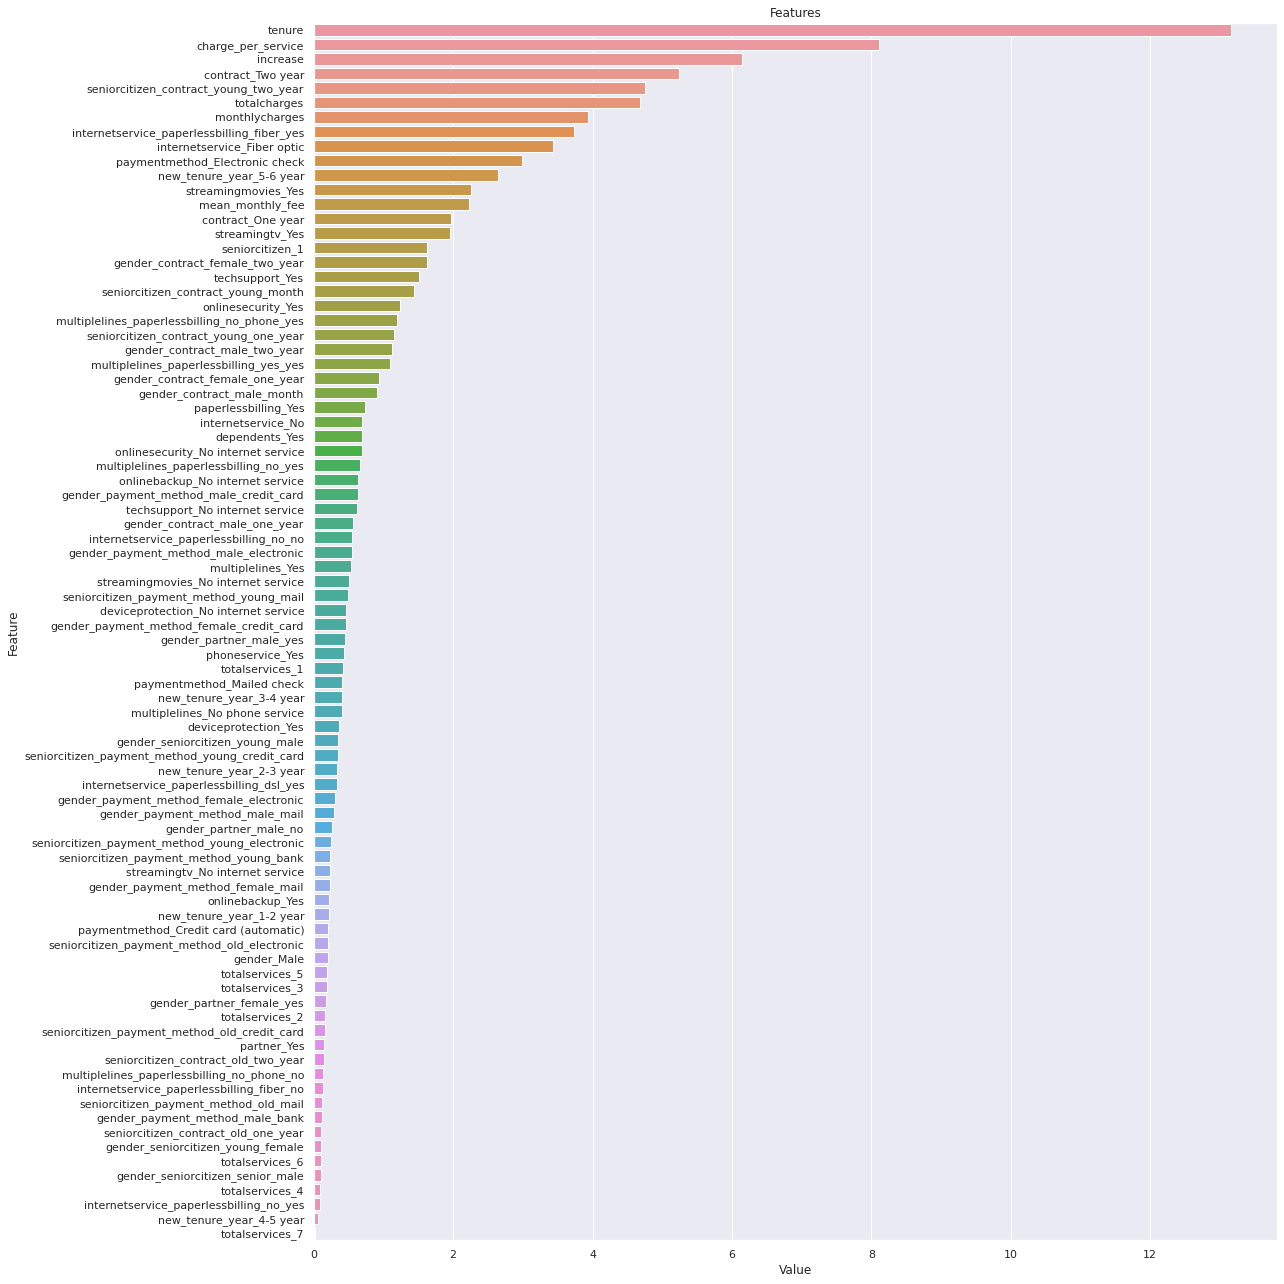

In [70]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(18, 18))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(catboost_final, X_new)

### As a conclusion, after the hyperparameter optimization, some of the feature extracted played a criticial role to predict the customer churn using CatBoost model.

### On the other hand, Lazy Predict helps to build many basic models without using a lot of code and helps to understand which models work better without any parameter adjustments. Let's write some code and predict customer churn fastly. 

### Let's install the lazypredict module

In [71]:
!pip install lazypredict

In [72]:
from lazypredict.Supervised import LazyClassifier

In [73]:
X_new_train, y_new_train, X_new_test, y_new_test = train_test_split(X_new, y_new, test_size=0.30, random_state=19)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_new_train, y_new_train, X_new_test, y_new_test)
print(models)

100%|██████████| 29/29 [00:22<00:00,  1.32it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  Time Taken
Model                                                                                    
BernoulliNB                        0.75               0.77     0.77      0.76        0.06
NearestCentroid                    0.73               0.77     0.77      0.75        0.07
GaussianNB                         0.70               0.76     0.76      0.72        0.04
LinearDiscriminantAnalysis         0.81               0.74     0.74      0.81        0.21
Perceptron                         0.77               0.73     0.73      0.77        0.09
LogisticRegression                 0.81               0.73     0.73      0.80        0.23
LinearSVC                          0.81               0.72     0.72      0.80        1.85
CalibratedClassifierCV             0.81               0.72     0.72      0.80        6.60
AdaBoostClassifier                 0.80               0.72     0.72      0.79        0.61
RidgeClass

# **Thank you for checking my notebook!**